#### Before running the code:

#### - Upload the notation fonts `/fonts/OpusStd.ttf` and `/fonts/OpusSpecialStd.ttf` into `/content` folder

#### - Upload `/predict_xyz.json`


In [ ]:
# -*- coding: utf-8 -*-

# dependencies
from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import random
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from scipy import interpolate
import csv
import pandas as pd
import json
import math


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
from google.colab import drive
import shutil

global fig_num
fig_num = 1

# mount Google Drive
drive.mount('/content/drive')

# path to the source file
source_file_path_1 = '/content/drive/MyDrive/train_xyz.json'
source_file_path_2 = '/content/drive/MyDrive/slider_values.json'

# destination directory in Colab notebook
destination_directory = '/content'

shutil.copy(source_file_path_1, destination_directory)
shutil.copy(source_file_path_2, destination_directory)


Mounted at /content/drive


'/content/slider_values.json'

In [ ]:
# fix the format
with open("train_xyz.json", "r") as file:
    data = json.load(file)

x_values = data["x"]
y_values = data["y"]
z_values = data["z"]

output = []
for x, y, z in zip(x_values, y_values, z_values):
    output.append({"x": x, "y": y, "z": z})

with open("train_xyz.json", "w") as file:
    json.dump(output, file, indent=4)


In [ ]:
# Extract the xyz training values
with open("train_xyz.json", "r") as file:
    coordinates_data = json.load(file)

x_values = [item["x"] for item in coordinates_data]
y_values = [item["y"] for item in coordinates_data]
z_values = [item["z"] for item in coordinates_data]

input_features = np.array(list(zip(x_values, y_values, z_values)))

with open("slider_values.json", "r") as file:
    slider_values_data = json.load(file)

print(slider_values_data)
# this needs to be exactly in [[1 2 3 4] [1 2 3 4]] format
# output_features = np.array([list(item.values()) for item in slider_values_data])
output_features = np.array(slider_values_data)

np.set_printoptions(formatter={'float': '{:0.2f}'.format})
print("Input Features:")
print(input_features)
print("\nOutput Features:")
print(output_features)


[[1.6, 4, 1.42, 0.0, 0.05, 0.15, 16, 0.13, 0.67, 0.36, 0.16, 0.4, 0.89, 0, 1, 0, 0.04, 0.97, 0.49, 0.15, 0.57, 0.81, 0, 0, 2], [1.04, 6, 2.96, 0.0, 0.21, 0.02, 12, 0.29, 0.0, 0.81, 0.21, 0.42, 0.84, 2, 0, 0, 0.91, 0.38, 0.99, 0.08, 0.45, 0.83, 0, 1, 1]]
Input Features:
[[0.09 0.86 0.50]
 [0.63 0.87 0.84]]

Output Features:
[[1.60 4.00 1.42 0.00 0.05 0.15 16.00 0.13 0.67 0.36 0.16 0.40 0.89 0.00
  1.00 0.00 0.04 0.97 0.49 0.15 0.57 0.81 0.00 0.00 2.00]
 [1.04 6.00 2.96 0.00 0.21 0.02 12.00 0.29 0.00 0.81 0.21 0.42 0.84 2.00
  0.00 0.00 0.91 0.38 0.99 0.08 0.45 0.83 0.00 1.00 1.00]]


In [ ]:
# # Convert strings to numeric values
# def convert_to_number(s):
#     try:
#         return float(s) if '.' in s else int(s)
#     except ValueError:
#         return s

# # Convert to list of lists with numeric
# output_features = [[convert_to_number(item) for item in inner] for inner in output_features]

# print(output_features)


TypeError: argument of type 'numpy.float64' is not iterable

#### Train the MLP

In [ ]:
if input_features.dtype != np.float32:
    input_features = input_features.astype(np.float32)

if output_features.dtype != np.float32:
    output_features = np.array(output_features)
    output_features = output_features.astype(np.float32)

# define and compile the MLP model
model = Sequential()
model.add(Dense(26, input_dim=3, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(25, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(input_features, output_features, epochs=3000, batch_size=32)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 18ms/step - loss: 0.1023
Epoch 502/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.1014
Epoch 503/3000
1/1 [==============================] - 0s 24ms/step - loss: 0.1004
Epoch 504/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.0995
Epoch 505/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0985
Epoch 506/3000
1/1 [==============================] - 0s 19ms/step - loss: 0.0976
Epoch 507/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.0967
Epoch 508/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0958
Epoch 509/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.0949
Epoch 510/3000
1/1 [==============================] - 0s 20ms/step - loss: 0.0940
Epoch 511/3000
1/1 [==============================] - 0s 18ms/step - loss: 0.0931
Epoch 512/3000
1/1 [==============================] - 0s 18ms/

In [ ]:
# fix the format for predict
with open("predict_xyz.json", "r") as file:
    data = json.load(file)

x_values = data["x"]
y_values = data["y"]
z_values = data["z"]

output = []
for x, y, z in zip(x_values, y_values, z_values):
    output.append({"x": x, "y": y, "z": z})

with open("predict_xyz.json", "w") as file:
    json.dump(output, file, indent=4)



In [ ]:
# read/extract the provided input for prediction
with open("predict_xyz.json", "r") as file:
    predict_xyz = json.load(file)

x_values = [item["x"] for item in predict_xyz]
y_values = [item["y"] for item in predict_xyz]
z_values = [item["z"] for item in predict_xyz]

input_features = np.array(list(zip(x_values, y_values, z_values)))

print("\nPrediction Features:")
print(input_features)



Prediction Features:
[[0.19 0.87 0.15]
 [0.51 0.25 0.50]]


In [ ]:
# predict

import numpy as np

slider_values = []

for pair in input_features:
    input_data = np.array([pair])
    predicted_output = model.predict(input_data)
    predicted_output_values = predicted_output.flatten().tolist()

    print("Predicted Output:")
    print(predicted_output_values)

    slider_values.append(predicted_output_values)

print('slider_values: ', slider_values)



1/1 [==============================] - 0s 112ms/step
Predicted Output:
[1.4198956489562988, 3.3183786869049072, 1.0896081924438477, -0.01651090383529663, 0.10100780427455902, 0.08141335099935532, 14.797585487365723, 0.11611634492874146, 0.7207188606262207, 0.19924424588680267, 0.21590763330459595, 0.3852693736553192, 0.8662768602371216, -0.28264209628105164, 0.9535086154937744, -0.03609788417816162, -0.1554277539253235, 0.882807731628418, 0.4006330072879791, 0.10778459161520004, 0.5405053496360779, 0.6448903679847717, 0.0235249325633049, -0.058209873735904694, 1.8886349201202393]
1/1 [==============================] - 0s 22ms/step
Predicted Output:
[0.5199577808380127, 3.6159703731536865, 1.7188498973846436, -0.022134199738502502, 0.2308058887720108, -0.036752887070178986, 6.3799824714660645, 0.03253203630447388, -0.1554507464170456, 0.4016120433807373, 0.24908649921417236, 0.26757383346557617, 0.4266783595085144, 1.409749150276184, -0.03492803871631622, -0.005961894989013672, 0.580133

In [ ]:
# recursive func for forcing boundaries
def adjust_xbound(x_off, speed):
    if (x_data[0]*speed) + x_off < 0.4:
        x_off += 0.1
        speed *= 0.8
        return adjust_xbound(x_off, speed)
    elif (x_data[-1]*speed) + x_off > 10.0:
        x_off -= 0.1
        speed *= 0.8
        return adjust_xbound(x_off, speed)
    else:
        return [x_off, speed]

In [ ]:
gen_rhythm = []
gen_pitch = []
gen_acc = []
gen_dyn_amps = []
gen_dyn_mean = []
gen_dyn_dev = []
gen_timb_amps = []
gen_timb_mean = []
gen_timb_dev = []


timbre vals:  [[0.22, 0.39, 0.87]]
y_off 0.0
y_std_dev:  2
y_data:  [3, 6, 1]
beat_start <= 2 and beat_end <= 3
x_off 1.09
x_data:  [-0.24094483807718162, 1.4226477115273413, 2.869551281202019]
inset_data_x:  [0.44905516192281847, 2.1126477115273414, 3.559551281202019]
inset_data_y:  [0.33 0.33 0.33]


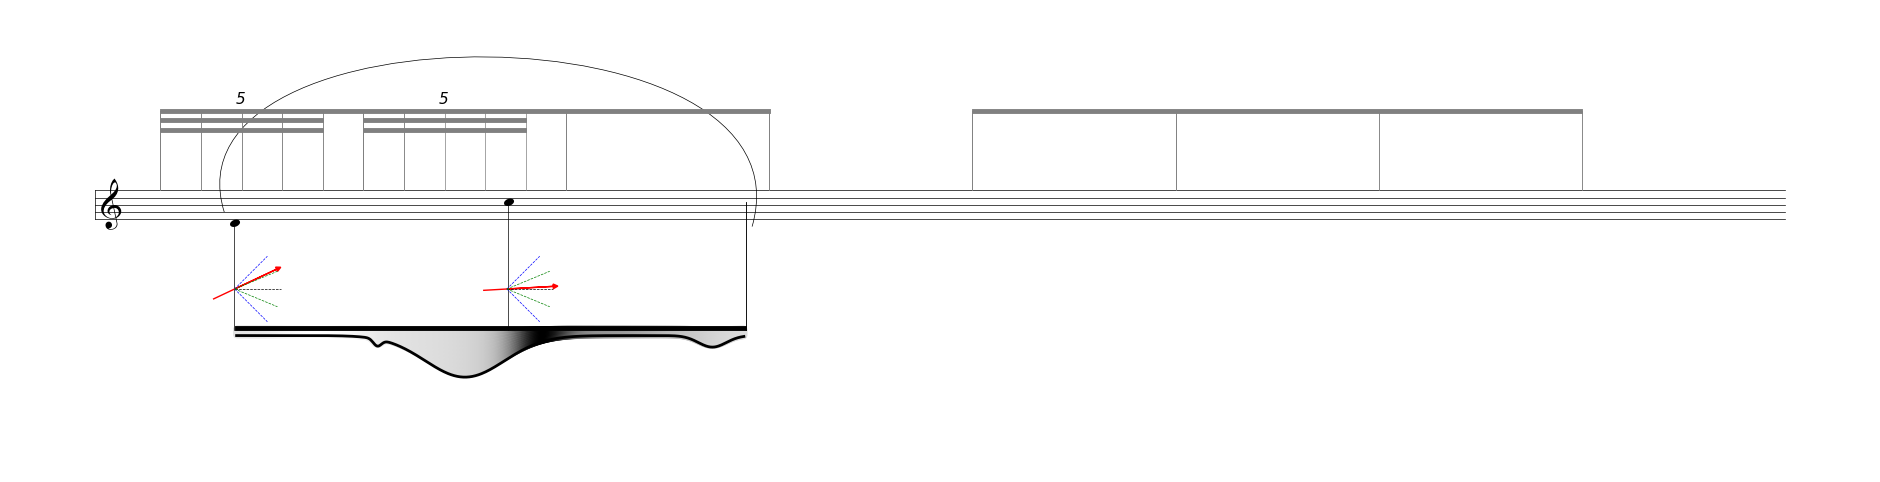

timbre vals:  [[0.22, 0.39, 0.87], [0.25, 0.27, 0.43]]
y_off 0.0
y_std_dev:  0
y_data:  [6, 6, 6]
beat_start <= 2 and beat_end <= 3
x_off 1.72
x_data:  [0.00027385970482785433, 0.6006243671621109, 0.8793821480241605]
inset_data_x:  [1.3202738597048278, 1.9206243671621106, 2.1993821480241604]
inset_data_y:  [0.33 0.33 0.33]


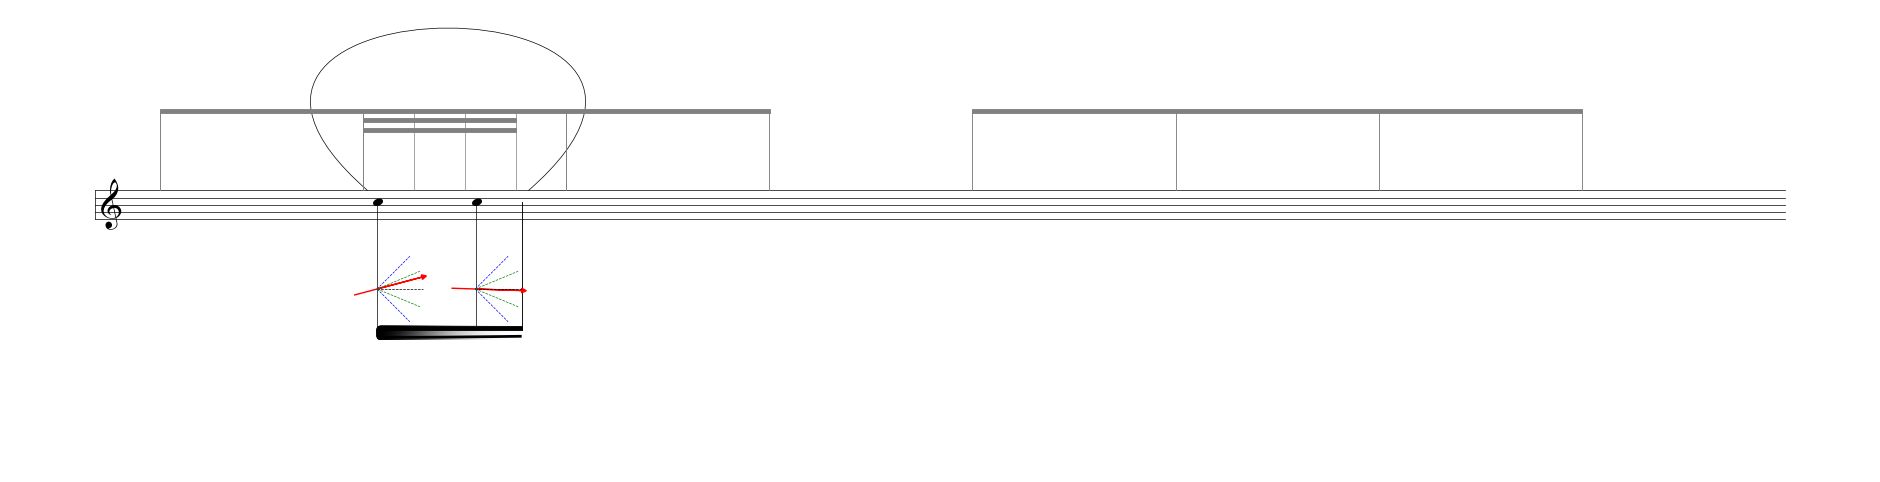

In [ ]:
# np.random.seed(seed)

import warnings
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Arc


font_dirs = ["/content"]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

fontprop2 = fm.FontProperties(fname=font_files[1], size=20)
fontprop1 = fm.FontProperties(fname=font_files[0], size=20)

# constants & variables
# seed = 1000
# random.seed(seed)

rhythms = []
pitches = []
amps = []
amp_means = []
timbre_amps = []
timbre_amp_means = []
acc_data = []

# get the values
for values in slider_values:
  speed_slider = round(values[0], 2)
  size_slider = int(values[1])
  x_offset_sl = round(values[2], 2)
  y_offset_sl = round(values[3] * 2) / 2 # 0.5 increments
  rhythm_deviation = round(values[4], 2)
  pitch_deviation = round(values[5], 2)
  accidental_deviation = int(values[6])
  amp_1_slider = round(values[7], 2)
  amp_2_slider = round(values[8], 2)
  amp_3_slider = round(values[9], 2)
  amp_mean1_slider = round(values[10], 2)
  amp_mean2_slider = round(values[11], 2)
  amp_mean3_slider = round(values[12], 2)
  amp_kurt1_but = int(values[13])
  amp_kurt2_but = int(values[14])
  amp_kurt3_but = int(values[15])
  tamp_1_slider = round(values[16], 2)
  tamp_2_slider = round(values[17], 2)
  tamp_3_slider = round(values[18], 2)
  tamp_mean1_slider = round(values[19], 2)
  tamp_mean2_slider = round(values[20], 2)
  tamp_mean3_slider = round(values[21], 2)
  tamp_kurt1_but = int(values[22])
  tamp_kurt2_but = int(values[23])
  tamp_kurt3_but = int(values[24])

  amps.append([amp_1_slider, amp_2_slider, amp_3_slider])
  amp_means.append([amp_mean1_slider, amp_mean2_slider, amp_mean3_slider])
  timbre_amps.append([tamp_1_slider, tamp_2_slider, tamp_3_slider])
  timbre_amp_means.append([tamp_mean1_slider, tamp_mean2_slider, tamp_mean3_slider])

  print("timbre vals: ", amp_means)

  # create the figure and subplot:
  fig = plt.figure(figsize=(24, 6))

  ax = plt.subplot(1, 1, 1)

  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)

  # constants & variables
  # seed_value = 1234
  # np.random.seed(seed_value)

  phan_off = 0.46
  base_y = -15.1

  # staff lines
  X_1, Y_1 = np.linspace(0.06, 10.345, 10), np.zeros(10)
  # measure lines
  X_2, Y_2 = np.linspace(0.06, 0.06, 10), np.linspace(4, 0, 10)

  # notes:
  noteheads = ['f', ' ']
  notes = []

  for i in range(len(noteheads)):
    notes.append(noteheads[i])

  # sec_offset = [0, 0] #3.07 threshold
  sec_offset = np.zeros(len(output_features)) #3.07 threshold

  x_off = x_offset_sl
  y_off = y_offset_sl
  print("y_off", y_off)


  ## input etc. TODO: dataset input option
  speed = speed_slider
  size = size_slider

  ## Speed / rhythmic irregularity / textural direction
  x_mean = 0
  x_std_dev = rhythm_deviation

  # Add randomness
  x_data = list(range(size))
  x_data = [x + np.random.normal(x_mean, x_std_dev) for x in x_data]

  x_off, speed = adjust_xbound(x_off, speed)

  x_data = [i*speed for i in x_data]

  # Ensure the sequence is strictly increasing
  for i in range(1, len(x_data)):
      if x_data[i] <= x_data[i - 1]:
          x_data[i] = x_data[i - 1] + 0.001  # Adjust as needed

  y_data = list(range(size))
  # print("y_data: ", y_data)
  y_mean = np.mean([0,13])
  y_std_dev = pitch_deviation
  # y_std_dev = 0.1
  y_std_dev = round(y_std_dev * 26)
  y_std_dev = max(0, min(y_std_dev, 13))
  print("y_std_dev: ", y_std_dev)
  y_data = [round(np.random.normal(y_mean, y_std_dev)) for y in y_data]
  print("y_data: ", y_data)

  for i in range(size-1):
    pitch = y_data[i]+y_off
    pitch_offset = -3.55
    rhythms = x_data
    rhythm = rhythms[i] # NOT PYTHONIC IN A WEIRD WAY
    ledger_off_low = (pitch+pitch_offset)+0.55
    ledger_off_hi = (pitch+pitch_offset)-4.45


    # ledger lines def
    L1_x, L1_y = np.linspace(rhythm+x_off+0.01, rhythm+x_off+0.11, 10), np.full((10, ), ledger_off_low)
    L2_x, L2_y = np.linspace(rhythm+x_off+0.01, rhythm+x_off+0.11, 10), np.full((10, ), ledger_off_hi)


  #### MELODY
    plt.text((rhythm + 0.035)+x_off, pitch+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # stems
    ax.plot(np.linspace(rhythm+x_off + 0.06, rhythm+x_off + 0.06, 10), np.linspace((pitch+pitch_offset), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # ledger lines
    if pitch < 3.0 and (pitch % 1) == 0.0:
      for i in range(5):
        ax.plot(L1_x, L1_y + i, linestyle='solid', linewidth=0.5, color='black')
    elif pitch < 3.0 and (pitch % 1) != 0.0:
      for i in range(5):
        ax.plot(L1_x, L1_y-0.5 + i, linestyle='solid', linewidth=0.5, color='black')
    if pitch > 8.0 and (pitch % 1) == 0.0:
      for i in range(5):
        ax.plot(L2_x, L2_y + i, linestyle='solid', linewidth=0.5, color='black')
    elif pitch > 8.0 and (pitch % 1) != 0.0:
      for i in range(5):
        ax.plot(L2_x, L2_y+0.5 + i, linestyle='solid', linewidth=0.5, color='black')

  # last stems
    ax.plot(np.linspace(x_data[-1]+x_off + 0.06, x_data[-1]+x_off+ 0.06, 10), np.linspace((y_data[-2]+pitch_offset), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # plot the staff lines
  for i in range(5):
      ax.plot(X_1, y_off + Y_1 + i, linestyle='solid', linewidth=0.5, color='black')

#@@
  # plot the treble clef
  plt.text(0.1, 0.9 + y_off, '&', fontproperties=fontprop1)
  # plt.text(0.1, 2.8 + y_off, '?', fontproperties=fontprop1)


  # plot the measure lines and lower beams:
  ax.plot(X_2, Y_2, linestyle='solid', linewidth=0.5, color='black')
  ax.plot(np.linspace((x_data[0])+x_off+0.075, (x_data[size-1])+ x_off+0.05, 10), np.linspace(base_y, base_y, 10), linestyle='solid', linewidth=3.5, color='black')


  ## Slur w/ Bezier curve

  # start and end points
  x_start, y_start = x_data[0] + x_off, y_data[0] + y_off -2
  x_end, y_end = x_data[size-1] + x_off+0.1, y_data[size-1] + y_off -2

  mid_x, mid_y = (x_start + x_end) / 2, (y_start + y_end) / 2

  control_height = 30 # Adjust this value as needed for symmetry

  control1_x, control1_y = mid_x-2, mid_y + control_height
  control2_x, control2_y = mid_x+2, mid_y + control_height

  # path of the cubic Bezier curve
  path = mpatches.Path([(x_start, y_start),
                        (control1_x, control1_y),
                        (control2_x, control2_y),
                        (x_end, y_end)],
                        [mpatches.Path.MOVETO, mpatches.Path.CURVE4, mpatches.Path.CURVE4, mpatches.Path.CURVE4])


  # x_start, y_start = x_data[0]+ x_off-0.45+sec_offset[feature], y_data[0]+y_offset_slider.value
  # x_end, y_end = x_data[size-1]+ x_off-0.45+sec_offset[feature], y_data[size-1]+y_offset_slider.value

  # # control points for the Bezier
  # control_x, control_y = (x_data[0] + x_data[size-1])+x_off-0.45+sec_offset[feature] - 0.5, (y_data[0]+y_offset_slider.value) + 32

  # # path of the Bezier
  # path = mpatches.Path([(x_start+0.45, y_start-1.0),
  #                       (control_x-2, control_y),
  #                       (x_end+0.5, y_end-1.0)], [1, 3, 3], closed=False) #[1, 3, 3]

  patch = mpatches.PathPatch(path, edgecolor='black', facecolor='none', lw=0.5)

  ax.add_patch(patch)


  # phantom rhythms:
  beat = 1.235

  beats = []
  for i in range(8):
    beats.append(beat*i)

  for i in range(len(beats)):
    if x_data[0]+x_off >= beats[i]:
      beat_start = math.floor(beats[i]/beat)
    if x_data[-1]+x_off >= beats[i]:
      beat_end = math.ceil(beats[i]/beat)

  divisions = [0.0]
  tuplet_val = []
  div_val = []
  true_div_val = []
  div_start = 0
  div_end = 0
  step = 1
  total = 0
  border = 0

  for i in range(8):
    beats.append(beat*i)
    tuplet_val.append(random.choice([1, 2, 3, 4, 5]))
    # tuplet_val.append(random.choice([1, 2, 3, 4, 5))
    if i < beat_start or i > beat_end-1:
      tuplet_val[i] = 1

    div_val.append(1/tuplet_val[i])
    true_div_val.append(beat*div_val[i])

    for j in range(tuplet_val[i]):
      total += true_div_val[i]
      divisions.append(total)
  divisions = divisions[:-1]

  for i in range(beat_start, beat_end, step):
    p1 = beats[i]
    font = {'style': 'italic', 'size': 11}
    pair = [p1, p1+(true_div_val[i]*(tuplet_val[i]-1))] #true_div_val controls the interval
    border += tuplet_val[i]
    border = border+2 # dirty solution to take care of the missing stem in divisions.
    div_start = 0
    div_end = border
    beam_off = 0.01

    #lower and middle beams for phantoms
    if tuplet_val[i] == 1:
      pass
    if tuplet_val[i] == 2:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 3:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.85, 16, f'{tuplet_val[i]}', fontdict=font)
    elif tuplet_val[i] == 4:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 5:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.92, 16, f'{tuplet_val[i]}', fontdict=font)


  #phantom beams
  if beat_start <= 2 and beat_end <= 3:
    print('beat_start <= 2 and beat_end <= 3')
    if beat_start >= beat_end:
      beat_end == 3
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start > 3 and beat_end <= 8:
    print('beat_start > 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start < 3 and beat_end <= 8:
    print('beat_start < 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start <= 3 and beat_end >= 4:
    print('beat_start <= 3 and beat_end >= 4')
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  #phantom stems on beats
  ax.plot(np.linspace(beats, beats, 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
  # print("beats: ", beats[-1])


  ##############
  ### TIMBRE ###

  ## MAIN CURVE FOR DYNAMICS
  curve_size = 500

  # Generate x values
  x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)
  phrase_length = ((x_data[size-1]+x_off+0.075)-(x_data[0]+x_off+0.05))


  if amp_kurt1_but == 0:
    std_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif amp_kurt1_but == 1:
    std_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif amp_kurt1_but == 2:
    std_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if amp_kurt2_but == 0:
    std_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif amp_kurt2_but == 1:
    std_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif amp_kurt2_but == 2:
    std_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66, 1.0])
  else:
      pass

  if amp_kurt3_but == 0:
    std_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif amp_kurt3_but == 1:
    std_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif amp_kurt3_but == 2:
    std_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  y1 = (amp_1_slider*8) * np.exp(-(x - (amp_mean1_slider*phrase_length)-x_off)**2 / (2 * std_dev1**2))
  y2 = (amp_2_slider*8) * np.exp(-(x - (amp_mean2_slider*phrase_length)-x_off)**2 / (2 * std_dev2**2))
  y3 = (amp_3_slider*8) * np.exp(-(x - (amp_mean3_slider*phrase_length)-x_off)**2 / (2 * std_dev3**2))

  ## COLLECT for SC @DUZELT!
  gen_dyn_amps.append((amp_1_slider, amp_2_slider, amp_3_slider))
  gen_dyn_mean.append((amp_mean1_slider, amp_mean2_slider, amp_mean3_slider))
  gen_dyn_dev.append((std_dev1, std_dev2, std_dev3))

  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.6:
      y = y1 + y2 + y3
    elif length < 0.6 and length >= 0.3:
      y = y1 + y2
    elif length < 0.3 and length >= 0.1:
      y = y1

  y = (-y) - 1.0 # invert, add space
  y = y + base_y

  print("x_off", x_off)


  ## CURVE FOR TIMBRE
  x_t = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)

  if tamp_kurt1_but == 0:
    tstd_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif tamp_kurt1_but == 1:
    tstd_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif tamp_kurt1_but == 2:
    tstd_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt2_but == 0:
    tstd_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif tamp_kurt2_but == 1:
    tstd_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif tamp_kurt2_but == 2:
    tstd_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt3_but == 0:
    tstd_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif tamp_kurt3_but == 1:
    tstd_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif tamp_kurt3_but == 2:
    tstd_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  yt_1 = (tamp_1_slider*8) * np.exp(-(x - (tamp_mean1_slider*phrase_length)-x_off)**2 / (2 * tstd_dev1**2))
  yt_2 = (tamp_2_slider*8) * np.exp(-(x - (tamp_mean2_slider*phrase_length)-x_off)**2 / (2 * tstd_dev2**2))
  yt_3 = (tamp_3_slider*8) * np.exp(-(x - (tamp_mean3_slider*phrase_length)-x_off)**2 / (2 * tstd_dev3**2))

  ## COLLECT for SC
  gen_timb_amps.append((tamp_1_slider, tamp_2_slider, tamp_3_slider))
  gen_timb_mean.append((tamp_mean1_slider, tamp_mean2_slider, tamp_mean3_slider))
  gen_timb_dev.append((tstd_dev1, tstd_dev2, tstd_dev3))


  # gen_timb_amps.append
  # gen_timb_mean.append
  # gen_timb_dev.append

  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.6:
      y_t = yt_1 + yt_2 + yt_3
    elif length < 0.6 and length >= 0.3:
      y_t = yt_1 + yt_2
    elif length < 0.3 and length >= 0.1:
      y_t = yt_1

  n = 10

  plt.plot(x, y, linewidth=2, color='black')

  base_x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)
  interpolations = np.linspace(0, 1, n+2)[1:-1] # n+1 segments with n+2 points.
  interpolated_y = [np.interp(x, base_x, base_y + t * (y - base_y)) for t in interpolations] # vertical interpolations

  # ######
  # Define the color gradient range and values
  color_start = 'white'
  color_end = 'black'

  cmap = LinearSegmentedColormap.from_list('gradient', [color_start, color_end])

  # # Normalize the y values to [0, 1]
  y_norm = (y_t - np.min(y_t)) / (np.max(y_t) - np.min(y_t))

  for i, interpolated_curve in enumerate(interpolated_y):
      color = cmap(y_norm)  # Calculate the color based on the normalized y values
      ax.scatter(x, interpolated_curve, color=color, s=15)

  plt.plot(x, y, color='black', linewidth=0)
  for i, interpolated_curve in enumerate(interpolated_y):
      plt.plot(x, interpolated_curve, color='black', alpha=0.0, linewidth=0)

  print("x_data: ", x_data)


##@@@
## ACCIDENTALS
  acc_mean = 0
  acc_std_dev = accidental_deviation

  angles = list(range(size))
  angles = [np.random.normal(acc_mean, acc_std_dev) for ang in angles]
  # angles = np.full(size, 22.5)

  # inset_data_x = x_data
  # inset_data_x = [x_data[j]+(x_off+0.62) for j in range(len(x_data))]
  inset_data_x = [x_data[j]+(x_off-0.4) for j in range(len(x_data))]
  print("inset_data_x: ", inset_data_x)

  inset_data_y = np.full(size, 0.33)
  print("inset_data_y: ", inset_data_y)

  inset_width, inset_height = 0.17, 0.17

  for i, (angle) in enumerate(angles[:size-1]):
    angle_radians = np.radians(angle)
    second = 171.429 # 7-TET cents
    # second = 200 # 12-TET cents

    cents = angle_radians/(np.pi/(2*second))

    #COLLECT DATA for SC @DUZELT!
    acc_data.append(cents)

    x_acc = np.cos(angle_radians)
    y_acc = np.sin(angle_radians)

    coords = ax.transData.transform(np.column_stack((inset_data_x, inset_data_y)))

    trans_coords = fig.transFigure.inverted().transform(coords)

    norm_coords_x = trans_coords[:, 0]
    # norm_coords_y = trans_coords[:, 1]

    adjusted_x = norm_coords_x[i]-0.048
    adjusted_y = inset_data_y[i]
    # print("adjusted_y", adjusted_y)

    inset_ax = fig.add_axes([adjusted_x, adjusted_y, inset_width, inset_height])
    # inset_ax.set_layout='tight'
    # Set limits and aspect for the inset axes
    inset_ax.patch.set_alpha(0.0)
    inset_ax.set_aspect('equal', adjustable='box')

    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.01:
      inset_ax.arrow(0, 0, x_acc, y_acc, head_width=0.1, head_length=0.1, color='red', linewidth=1)
      inset_ax.plot([0, (-x_acc/2)], [0, (-y_acc/2)], color='red', linewidth=1)

      inset_ax.plot([0, 1], [0, 0], color='black', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, 0], [0, 1], color='black', linestyle='--', linewidth=0.5, alpha=0.0)
      inset_ax.plot([0, 0], [0, -1], color='black', linestyle='--', linewidth=0.5, alpha=0.0)

      inset_ax.plot([0, np.cos(np.pi/4)], [0, np.sin(np.pi/4)], color='blue', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, np.cos(-np.pi/4)], [0, np.sin(-np.pi/4)], color='blue', linestyle='--', linewidth=0.5)

      inset_ax.plot([0, np.cos(np.pi/8)], [0, np.sin(np.pi/8)], color='green', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, np.cos(-np.pi/8)], [0, np.sin(-np.pi/8)], color='green', linestyle='--', linewidth=0.5)

      # Add label in the inset
      # label_x, label_y = (0.0), (0.83)
      # label_sym = '+' if cents > 0 else ''
      # inset_ax.text(label_x, label_y, f'{label_sym}{round(cents, 2)}¢', fontsize=10, color='red')

    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

    inset_ax.spines['top'].set_visible(False)
    inset_ax.spines['bottom'].set_visible(False)
    inset_ax.spines['left'].set_visible(False)
    inset_ax.spines['right'].set_visible(False)

  # VIBRATO
    # ALL with Hann windows
    # with regularity or irregularity
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.6:
      t = np.linspace(0, length, 5000, endpoint=False)  # controls length

      car_freq = round(np.random.normal(1.0, 5.0), 2)
      am_freq = round(np.random.normal(1.0, 5.0), 2)
      fm_freq = round(np.random.normal(0.5, 2.0), 2)
      mul = round(np.random.uniform(0.5, 1.5), 2)

      car_sig = np.sin(car_freq * (2 * np.pi) * t)
      am_sig = np.sin(am_freq * (2 * np.pi) * t) * mul
      fm_sig = np.sin(fm_freq * (2 * np.pi) * t)
      am_res = am_sig * car_sig
      fm_res = np.cos(car_sig + mul * fm_sig)
      window = np.hanning(len(am_sig))
      am_fm = am_sig * fm_res
      alpha_val = 0.4

      vib = round(np.random.normal(0.0, 1.0), 0)

      if vib == -1.0:
        am_fm = am_fm * window * 1.75
      elif vib == 0.0:
        alpha_val = 0.0
      elif vib == 1.0:
        am_fm = am_sig * window

      # ax.plot(x_data[i]+x_off+t+0.08, y_data[i]+am_fm-3.7, 'Blue', alpha=alpha_val),

  ## COLLECT DATA for SC
  add_x_offset = [value + x_off for value in x_data]
  gen_rhythm.append(add_x_offset)

  add_y_offset = [value + y_off for value in y_data]
  gen_pitch.append(add_y_offset)

  accidentals = [value for value in acc_data]
  gen_acc.append(accidentals)

  # list comp. for the rest
  gen_dyn_amps = [list(tup) for tup in gen_dyn_amps]
  gen_dyn_mean = [list(tup) for tup in gen_dyn_mean]
  gen_dyn_dev = [list(tup) for tup in gen_dyn_dev]
  gen_timb_amps = [list(tup) for tup in gen_timb_amps]
  gen_timb_mean = [list(tup) for tup in gen_timb_mean]
  gen_timb_dev = [list(tup) for tup in gen_timb_dev]

  ax.set_xticks([])
  ax.set_yticks([])

  ax.set_ylim(-35, 29)

  # suppress warnings if necessary
  warnings.filterwarnings("ignore", category=UserWarning)
  plt.show()

# save if you want
#filename = f'notation_{fig_num}.jpg'
#plt.savefig(filename, format='jpg')
#fig_num += 1








In [ ]:
# print("gen_rhythm: ", gen_rhythm)
# print("gen_pitch: ", gen_pitch)
# print("gen_acc: ", gen_acc)
# print("gen_dyn_amps: ", gen_dyn_amps)
# print("gen_dyn_mean: ", gen_dyn_mean)
# print("gen_dyn_dev: ", gen_dyn_dev)
# print("gen_timb_amps: ", gen_timb_amps)
# print("gen_timb_mean: ", gen_timb_mean)
# print("gen_timb_dev: ", gen_timb_dev)

# ## correct all dyn/timb tuplets


gen_rhythm:  [[1.6197329561514764, 2.736283625158352, 3.7187010520971633, 5.306115609283967, 6.050416415527243, 8.040803952491308, 9.04833758342027], [1.8555622271876802, 2.9431841773310508, 4.487983538950721, 5.317399697069618, 6.624483404107022, 7.943998825438625, 9.072802629732996], [1.9271459345409068, 2.45724914197114, 3.6296395247072866, 4.479458170428233, 5.566899316823703, 6.478950457638585, 7.459561602345211, 8.499710461952589], [1.5295299698119036, 2.467553890255709, 3.9839386827971905, 4.6074434141218745, 5.7396115058072334, 6.5679097275098455, 7.773588362580159, 8.828511643195815], [2.1131033057369195, 2.7848136156496257, 4.092599653821856, 4.846415523914982, 6.371189280303451, 6.702093917687518, 8.077615228942477, 9.09867348389724, 9.82833949194775], [1.8004054208246065, 2.9658402237786667, 3.998704345766444, 5.05435325516876, 5.968160397572256, 7.443490117138, 7.904723222425555], [1.47917204810223, 2.484431891700406, 3.7468617967777726, 5.005723598109189, 6.07513655193118

##Export the data for SuperCollider

In [ ]:

# with open("gen_rhythm.json", "w") as file:
#     json.dump(gen_rhythm, file, indent=4)
# with open("gen_pitch.json", "w") as file:
#     json.dump(gen_pitch, file, indent=4)


data_files = {
    "gen_rhythm.json": gen_rhythm,
    "gen_pitch.json": gen_pitch,
    "gen_acc.json": gen_acc,
    "gen_dyn_amps.json": gen_dyn_amps,
    "gen_dyn_mean.json": gen_dyn_mean,
    "gen_dyn_dev.json": gen_dyn_dev,
    "gen_timb_amps.json": gen_timb_amps,
    "gen_timb_mean.json": gen_timb_mean,
    "gen_timb_dev.json": gen_timb_dev
}


for filename, data in data_files.items():
    with open(filename, "w") as file:
        json.dump(data, file, indent=4)


In [ ]:
destination_dir = '/content/drive/MyDrive/params'

for filename, data in data_files.items():
    source_file_path = f'./{filename}'

    with open(source_file_path, 'w') as file:
        json.dump(data, file, indent=4)

    destination_path = f'{destination_dir}/{filename}'

    shutil.copy(source_file_path, destination_path)